# To test the angular clustering

In [1]:
#Create a file to list all the parameters of cosmology in Abacus simulation
from __future__ import print_function

#####importing the necessary libraries
#To make the plots inline otherwise it will make seperate figure
%matplotlib inline 
#for high resolution plot outputs
%config InlineBackend.figure_format = 'retina'

import numpy as np

import os
import sys

#latex display
from IPython.display import Latex

import fitsio as F

####plottinng library and setting
import pylab as pl
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})
wdir='../jnk/'

In [8]:
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(ticks=True, grid=False, figsize=(10, 8))

# reset default matplotlib rcParams
jtplot.reset()

In [ ]:
static inline size_t find_dist_bin(const real dist, const real *restrict dbin,
    const int n) {
  size_t l, u;
  l = 0;
  u = n - 1;
  while (l <= u) {
    size_t i = (l + u) >> 1;
    if (dbin[i + 1] <= dist) l = i + 1;
    else if (dbin[i] > dist) u = i - 1;
    else return i;
  }
  return SIZE_MAX;
}

# Faizan's Catalogue

In [46]:
def Faizan_files(ftype='gal',tracer='LRG',sky='NGC'):
    'returns the file name of faizan fits file'
    faizan_dir='/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/'
    
    ftype_2_ext={'gal':'dat','rand':'ran'}
    
    if(tracer=='ELG'):
        version='v7'
    else:
        version='v7_2'
        
    fname='%s%s/eBOSS_%s_%s_pip_%s.%s.fits'%(faizan_dir,tracer,tracer,sky,version,ftype_2_ext[ftype])
    
    return fname

fh={}
for ftype in ['gal','rand']:
    fname=Faizan_files(ftype=ftype,tracer='ELG',sky='SGC')
    #print(fname)
    fh[ftype]=F.FITS(fname)
    print(ftype,fh[ftype][1],fh[ftype][1]['RA'][:].size)

gal 
  file: /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/ELG/eBOSS_ELG_SGC_pip_v7.dat.fits
  extension: 1
  type: BINARY_TBL
  rows: 147801
  column info:
    EBOSS_TARGET_ID     i8  
    RA                  f8  
    DEC                 f8  
    Z                   f8  
    WEIGHT_SYSTOT       f8  
    WEIGHT_CP           f8  
    WEIGHT_NOZ          f8  
    WEIGHT_FKP          f8  
    WEIGHT_BW           i8  array[60]
    FIBER               i8  
    CLUSTERING          i8   147801
rand 
  file: /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/ELG/eBOSS_ELG_SGC_pip_v7.ran.fits
  extension: 1
  type: BINARY_TBL
  rows: 4396498
  column info:
    RA                  f8  
    DEC                 f8  
    Z                   f8  
    WEIGHT_SYSTOT       f8  
    WEIGHT_CP           f8  
    WEIGHT_NOZ          f8  
    WEIGHT_FKP          f8  
    CLUSTERING          i8   4396498


In [41]:
NGC=3916720./121376
SGC=4396498./147801
print(NGC,SGC)

32.26931189032428 29.746063964384543


In [12]:
#ELG: 
NGC=121376
SGC=147801
print(SGC/NGC)

1.2177119035064592


In [27]:
NGC=5460719./151021
SGC=3453453./102111
print(NGC,SGC)

36.158673297091134 33.8205776067221


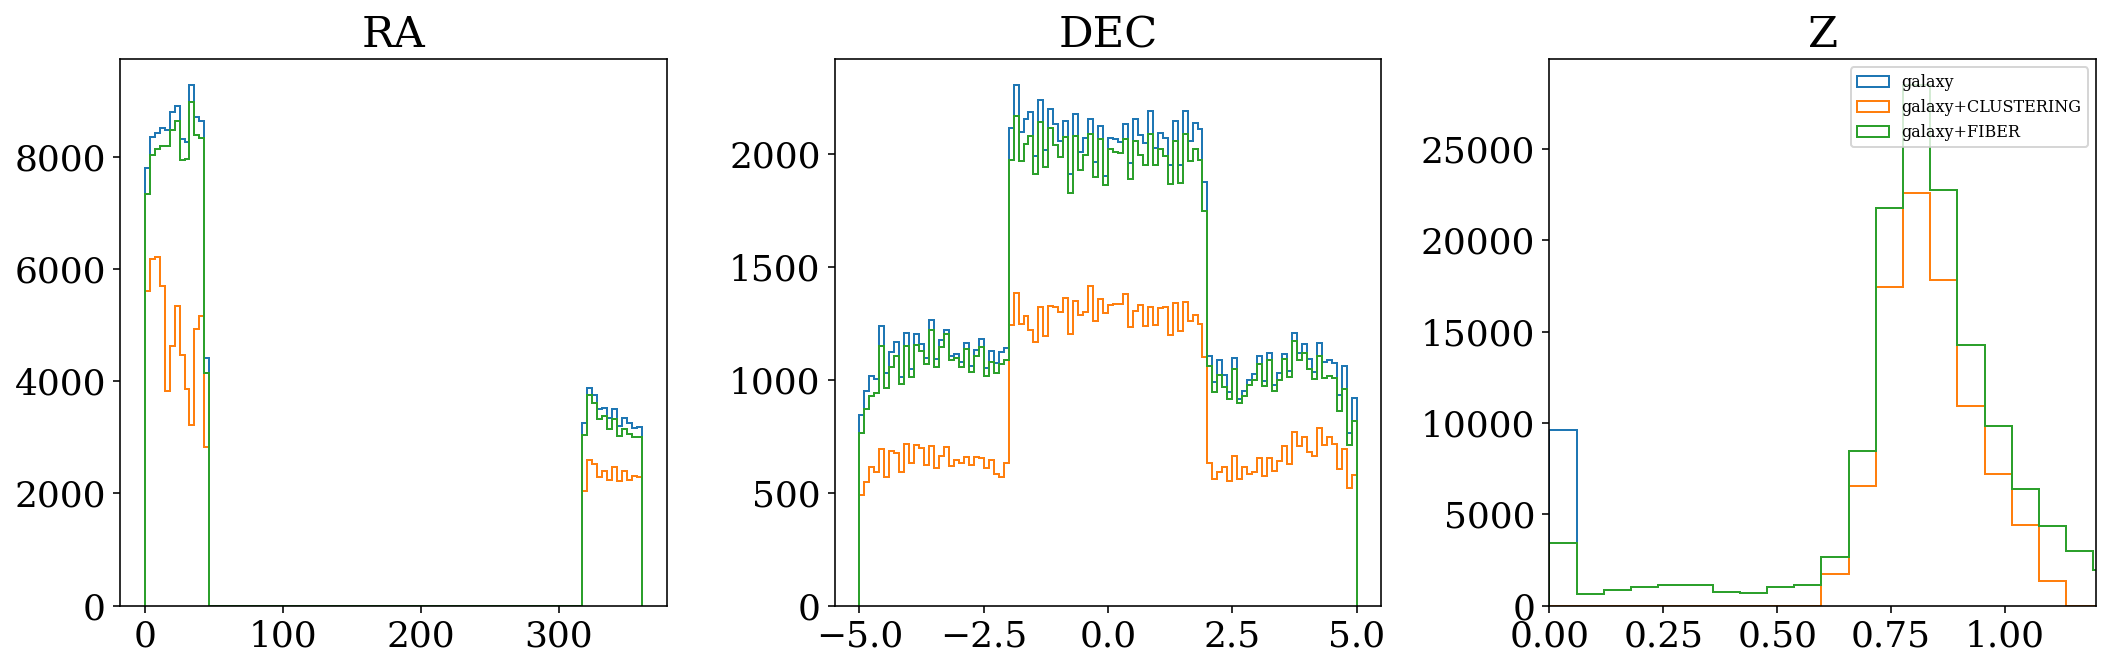

In [43]:
nrow=1;ncol=3
fig,axarr=pl.subplots(nrow,ncol,sharex=False,sharey=False,figsize=(15,nrow*5))

ind={'CLUSTERING':fh['gal'][1].where('CLUSTERING==1'),
     'FIBER':fh['gal'][1].where('FIBER==1'),
     #'CAF':fh['gal'][1].where('CLUSTERING==1 && FIBER==1'),
     #'COF':fh['gal'][1].where('CLUSTERING==1 || FIBER==1')
    }
for tt,tkey in enumerate(['RA','DEC','Z']):
    pl.sca(axarr[tt])
    hh=pl.hist(fh['gal'][1][tkey][:],bins=100,label='galaxy',histtype='step')
    #hh=pl.hist(fh['rand'][1][tkey][:],bins=hh[1],label='rand',histtype='step',normed=1)
    
    for ss,skey in enumerate(ind.keys()):
        hh1=pl.hist(fh['gal'][1][tkey][ind[skey]],bins=hh[1],label='galaxy+'+skey,histtype='step')
    
    if(tkey=='Z'):
        pl.xlim([0,1.2])
    pl.title(tkey)
    
pl.legend(fontsize=8)
    
pl.tight_layout()
    

In [24]:
for tt,tkey in enumerate(ind.keys()):
    print(tt,tkey,ind[tkey].size)

0 CLUSTERING 218450
1 FIBER 324239


In [250]:
for tt,tkey in enumerate(ind.keys()):
    print(tt,tkey,ind[tkey].size)

0 CLUSTERING 107500
1 FIBER 141992


In [28]:
#ELG jn region
#NGC: 13x6
# SGC: 30x3
90./78.

1.1538461538461537

gal 0.600088 0
rand 0.6000884398113578 0


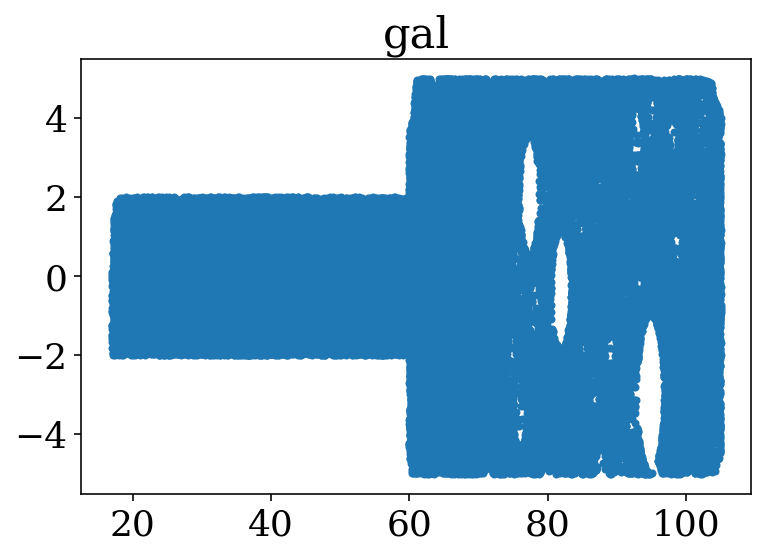

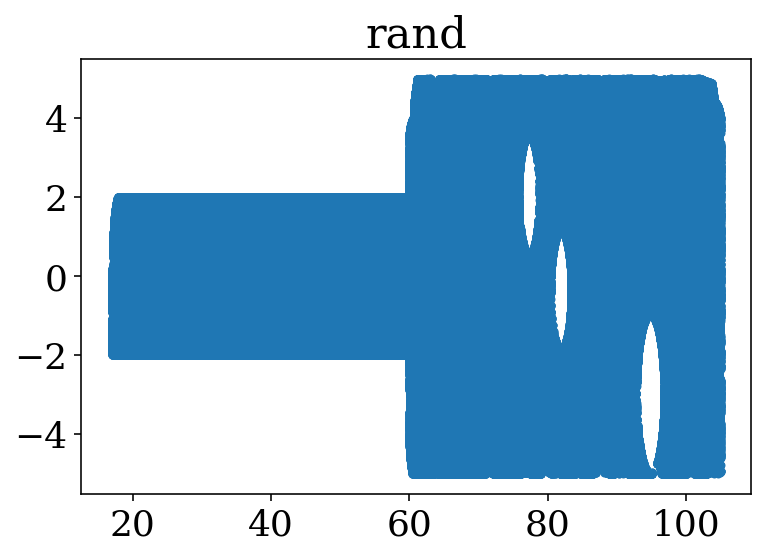

In [47]:
for ftype in ['gal','rand']:
    ind=fh[ftype][1].where('CLUSTERING==1')
    zz=fh[ftype][1]['Z'][ind]
    ra=fh[ftype][1]['RA'][ind]
    dec=fh[ftype][1]['DEC'][ind]
    inan=zz!=zz
    
    print(ftype,fh[ftype][1]['Z'][ind].min(),np.sum(inan))
    
    pl.figure()
    pl.plot(np.mod(ra[~inan]+60,360),dec[~inan],'.')
    #pl.plot(ra[inan],dec[inan],'.')
    pl.title(ftype)

gal 0.600078 0
rand 0.6000778662242253 0


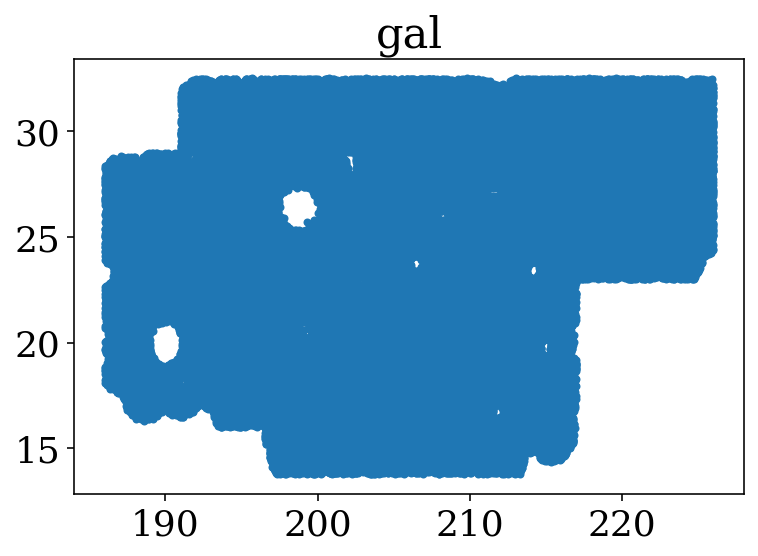

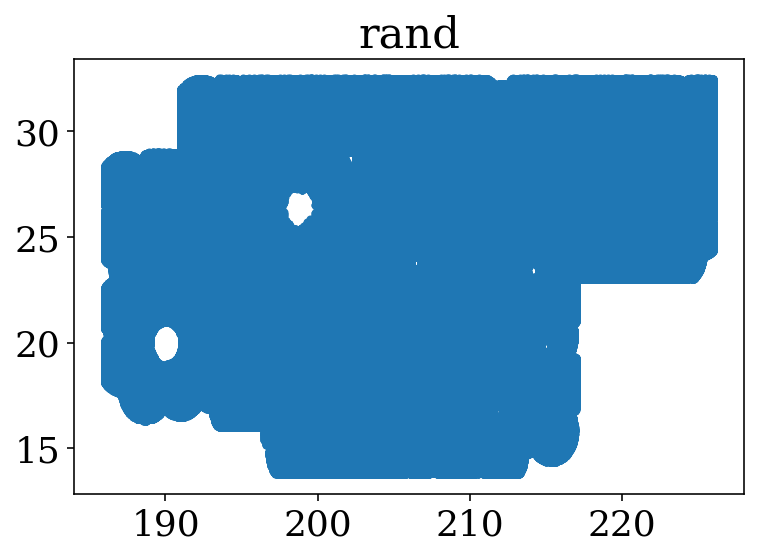

In [49]:
for ftype in ['gal','rand']:
    ind=fh[ftype][1].where('CLUSTERING==1')
    zz=fh[ftype][1]['Z'][ind]
    ra=fh[ftype][1]['RA'][ind]
    dec=fh[ftype][1]['DEC'][ind]
    inan=zz!=zz
    
    print(ftype,fh[ftype][1]['Z'][ind].min(),np.sum(inan))
    
    pl.figure()
    pl.plot(np.mod(ra[~inan]+60,360),dec[~inan],'.')
    #pl.plot(ra[inan],dec[inan],'.')
    pl.title(ftype)

In [78]:
print(47.8*13*6/(40*90))

1.0356666666666665


# Angular clustering

eBOSS_ELG_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_wsys-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_angup-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_iip-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_pip-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_pip_angup-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_SGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_SGC_z1z2-0.7-1.1_v7_2_CLUSTERING_wsys-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_SGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_angup-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_SGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_iip-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_SGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_pip-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_SGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_pip_angup-wp-logrp-pi-NJN-90.txt
eBOSS_ELG_NSGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1-wp-logrp-pi-NJN-180.txt
eBOSS_ELG_NSGC_z1z2-0.7-1.1_v7_2_CLUSTERING_wsys-

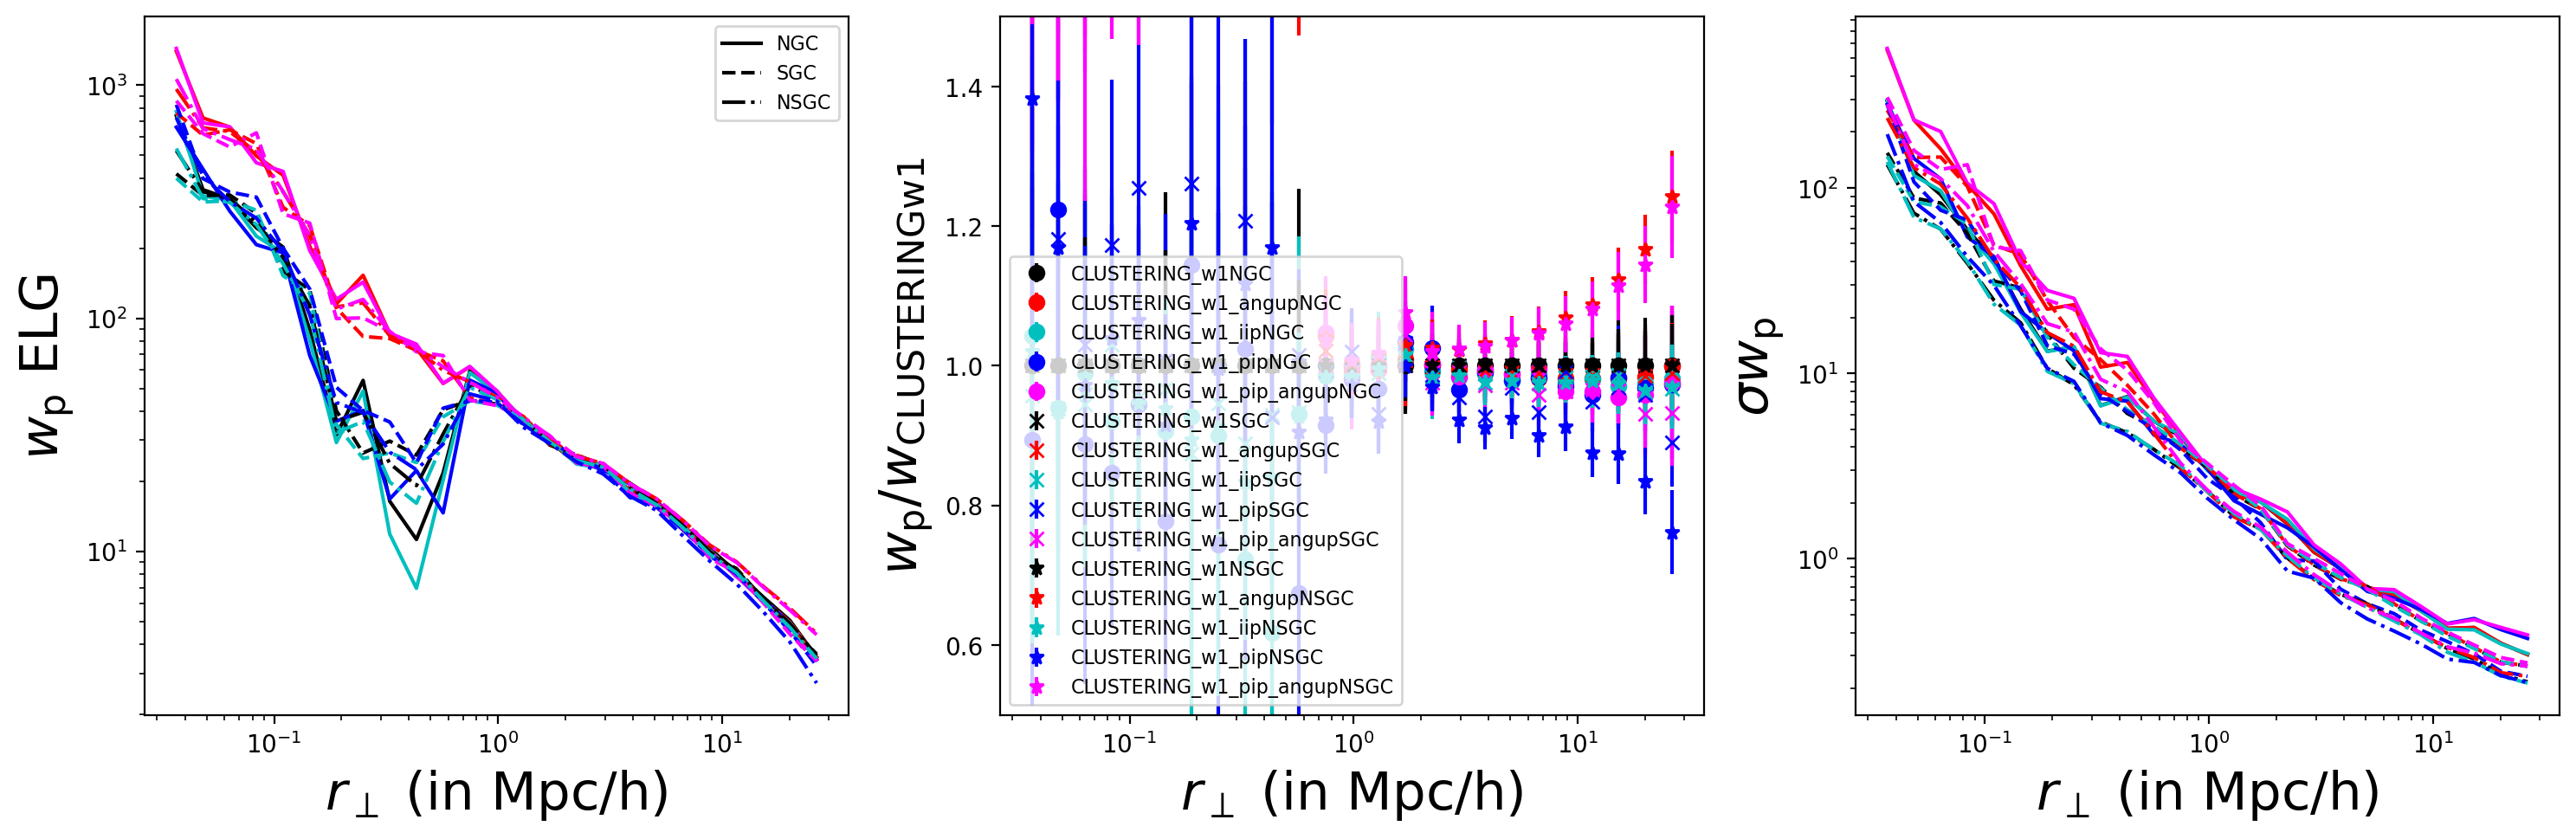

In [92]:
xi_dir='/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/'
wtheta_dir=xi_dir+'Wtheta/'
xi2d_dir=xi_dir+'XI2D/'
wp_dir=xi_dir+'WP/'

wthp_dic={}
#Wtheta/eBOSS_LRG_NGC_v7_2_CLUSTERING_wsys_pip-wtheta_DP-logangular-NJN-90.txt

nrow=1;ncol=3
fig,axarr=pl.subplots(nrow,ncol,sharex=False,sharey=False,figsize=(15,nrow*5))

tcol_dic={'w1':'k','w1_pip':'b','w1_iip':'c','w1_angup':'r','w1_pip_angup':'magenta',
         'wsys':'green'}

tmarks=['-','--','-.']
tfmts=['o','x','*']

#plot_quant='wtheta'
plot_quant='wp'

#sky='SGC'
#sky_list=['NGC','SGC','NSGC']
sky_list=['NGC','SGC','NSGC']
#sky='NSGC'
#tracer='QSO'
#tracer='LRG'
tracer='ELG'
#tracer='crossLRGxQSO'
#tracer='crossELGxQSO'
#tracer='crossELGxLRG'
z1z2=['0.7','1.1']

if(tracer in ['LRG','QSO','crossLRGxQSO']):
    njn_dic={'SGC':56,'NGC':90,'NSGC':146}
else:
    njn_dic={'SGC':90,'NGC':90,'NSGC':180}
    
if(plot_quant=='wtheta'):
    ylab=r'w_{\theta}'
    xlab=r'\theta'
    xunit='(in radians)'
    list_wtag=['ALL_w1','FIBER_w1','FIBER_w1_pip','CLUSTERING_w1','CLUSTERING_w1_pip','CLUSTERING_w1_iip',
             'FIBER_w1_angup','FIBER_w1_pip_angup','CLUSTERING_w1_angup','CLUSTERING_w1_pip_angup']
elif(plot_quant=='wp'):
    ylab=r'w_{\rm p}'
    xlab=r'r_{\perp}'
    xunit='(in Mpc/h)'
    list_wtag=['CLUSTERING_w1','CLUSTERING_wsys','CLUSTERING_w1_angup','CLUSTERING_w1_iip','CLUSTERING_w1_pip',
               'CLUSTERING_w1_pip_angup']

    
for ss,sky in enumerate(sky_list):   
    wthp_dic[sky]={}
    for wtag in list_wtag:  
        if(plot_quant=='wtheta'):
            fname='%seBOSS_%s_%s_v7_2_%s-wtheta_DP-logangular-NJN-%s.txt'%(wtheta_dir,tracer,sky,wtag,njn_dic[sky])
        elif(plot_quant=='wp'):
            fname='%seBOSS_%s_%s_z1z2-%s-%s_v7_2_%s-wp-logrp-pi-NJN-%d.txt'%(wp_dir,tracer,sky,
                                                                                   z1z2[0],z1z2[1],wtag,njn_dic[sky])

        print(fname.split('/')[-1])
        try:    
            wthp_dic[sky][wtag]=np.loadtxt(fname)
            #print(wtag,fname)
        except:
            continue
        

for ss,sky in enumerate(sky_list):          
    for wtag in list_wtag:

        if(wtag not in wthp_dic[sky].keys() or 'CLUSTERING' not in wtag ):
            if('ALL' not in wtag):
                continue
                #print(wtag)

        ref=wthp_dic[sky]['CLUSTERING_w1'][:,3]
        #ref=wthp_dic[sky]['ALL_w1'][:,1]

        if('ALL' in wtag):
            tmark='--'
        elif('FIBER' in wtag):
            tmark='-.'
        elif('CLUSTERING' in wtag):
            tmark='-'

        for tt,tkey in enumerate(tcol_dic.keys()):
            tweight='_'.join(wtag.split('_')[1:])
            if(tkey==tweight):
                tcol=tcol_dic[tkey]
                break

        if(wtag=='CLUSTERING_w1'):
            tlab_wp=sky
        else:
            tlab_wp=None
        pl.sca(axarr[0])
        pl.plot(wthp_dic[sky][wtag][:,0],wthp_dic[sky][wtag][:,3],tmarks[ss],color=tcol,label=tlab_wp)

        pl.sca(axarr[1])
        #pl.plot(wthp_dic[wtag][:,0],wthp_dic[wtag][:,1]/ref,tmark,color=tcol,label=wtag)
        pl.errorbar(wthp_dic[sky][wtag][:,0],wthp_dic[sky][wtag][:,3]/ref,
                    yerr=wthp_dic[sky][wtag][:,2]/ref,fmt=tfmts[ss],color=tcol,label=wtag+sky,mfc=None)

        pl.sca(axarr[2])
        pl.plot(wthp_dic[sky][wtag][:,0],wthp_dic[sky][wtag][:,2],tmarks[ss],color=tcol,label=wtag+sky)

        #plot mean of jn vs all
        #pl.sca(axarr[3])
        #pl.plot(wthp_dic[sky][wtag][:,0],wthp_dic[sky][wtag][:,3]/wthp_dic[sky][wtag][:,1],tmarks[ss],color=tcol,label=wtag+sky)

        #pl.errorbar(wth_dic[wtag][:,0],wth_dic[wtag][:,1]/ref,yerr=wth_dic[wtag][:,2]/ref,fmt='o',mfc='w',label=wtag)   


     
for ii in range(0,3):
    pl.sca(axarr[ii]) 
    
    if(plot_quant=='wtheta'):
        pl.plot([0.000292,0.000292],[-1,3],'k--',label='fiber (62 arcsec)')
        pl.plot([3.77e-5,3.77e-5],[-1,3],'k-.',label='8 arcsec')
    
    if(ii==0):
        pl.yscale('log')
        pl.ylabel(r'$%s$ %s'%(ylab,tracer),fontsize=22)
        pl.legend(fontsize=8)
    elif(ii==1):
        pl.legend(fontsize=8)
        #pl.yscale('log')
        pl.ylabel(r'$%s/w_{\rm CLUSTERING w1}$'%(ylab),fontsize=22)
        pl.ylim([0.5,1.5])
    elif(ii==2):
        pl.yscale('log')
        pl.ylabel(r'$\sigma{%s}$'%ylab,fontsize=22)

    #pl.ylim([-2,2])
    pl.xscale('log')
    pl.xlabel(r'$%s$ %s'%(xlab,xunit),fontsize=22)
    
pl.tight_layout()

plot_name='plots_eBOSS/eBOSS_%s_%s.png'%(tracer,plot_quant)
pl.savefig(plot_name)
pl.show()
#eBOSS_ELG_NGC_z1z2-0.7-1.1_v7_2_ALL_w1-wp-logrp-pi-NJN-90.txt

In [93]:
def prep_wp_dir_sarah():
    xi_dir='/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/'
    wp_in=xi_dir+'WP/'
    wp_eBOSS=xi_dir+'WP_eBOSS/'
    
    comm='cp -r plots_eBOSS %s.'%(wp_eBOSS)
    os.system(comm)
    
    sky_list=['NGC','SGC','NSGC']
    wtag_list=['w1-wp','w1_angup-wp','w1_iip-wp','w1_pip-wp','w1_pip_angup-wp']
    wp_all=os.listdir(wp_in)
    
    if(not os.path.isdir(wp_eBOSS)):
        os.mkdir(wp_eBOSS)
    
    for ss,sky in enumerate(sky_list):
        wpsky=wp_eBOSS+sky+'/'
        print('\n\n**** %s ***'%sky)
        if(not os.path.isdir(wpsky)):
                os.mkdir(wpsky)
                
        for ww,wtag in enumerate( wtag_list):
            wp_wtag=wpsky+wtag[:-3]+'/'
            print('**** %s ***'%wp_wtag)
            
            if(not os.path.isdir(wp_wtag)):
                os.mkdir(wp_wtag)

            for ff,fname in enumerate(wp_all):
                if('_'+sky in fname and wtag in fname and 'z1z2-0.7-1.1_v7_2_CLUSTERING' in fname):
                    comm='cp %s%s %s.'%(wp_in,fname,wp_wtag)
                    #print(comm)
                    os.system(comm)
                    
    return 

prep_wp_dir_sarah()



**** NGC ***
**** /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/NGC/w1/ ***
**** /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/NGC/w1_angup/ ***
**** /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/NGC/w1_iip/ ***
**** /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/NGC/w1_pip/ ***
**** /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/NGC/w1_pip_angup/ ***


**** SGC ***
**** /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/SGC/w1/ ***
**** /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/SGC/w1_angup/ ***
**** /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/SGC/w1_iip/ ***
**** /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/SGC/w1_pip/ ***
**** /Users/sh

In [86]:
#!rm -r /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP_eBOSS/
!mkdir plots_eBOSS

# Combine the NGC and SGC

In [105]:
corr_code='/Users/shock/Documents/Projects/CorrelationFunction/'
if(corr_code not in sys.path):
    sys.path=[corr_code]+sys.path
    print(sys.path)
import PairCountTOxi as pcxi

inroots=['eBOSS_QSO_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1','eBOSS_QSO_SGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1']
NJNs=[90,56]
outroot='eBOSS_QSO_NGC_SGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1'

ximode='auto'

pcxi.xi2d_wp_xi02_Manyfroot_jn(inroots=infroots,NJNs=NJNs,
                    xi2droot=xi2d_dir+outroot,outroot=wp_dir+outroot,
                    xitype=ximode,nscomb=1,samp='logrp-pi')

['/Users/shock/Documents/Projects/CorrelationFunction/', '/Users/shock/Documents/Projects/CorrelationFunction/extra_tool', '/Users/shock/anaconda3/lib/python37.zip', '/Users/shock/anaconda3/lib/python3.7', '/Users/shock/anaconda3/lib/python3.7/lib-dynload', '', '/Users/shock/anaconda3/lib/python3.7/site-packages', '/Users/shock/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/shock/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/shock/.ipython']


AttributeError: module 'PairCountTOxi' has no attribute 'xi2d_wp_xi02_Manyfroot_jn'

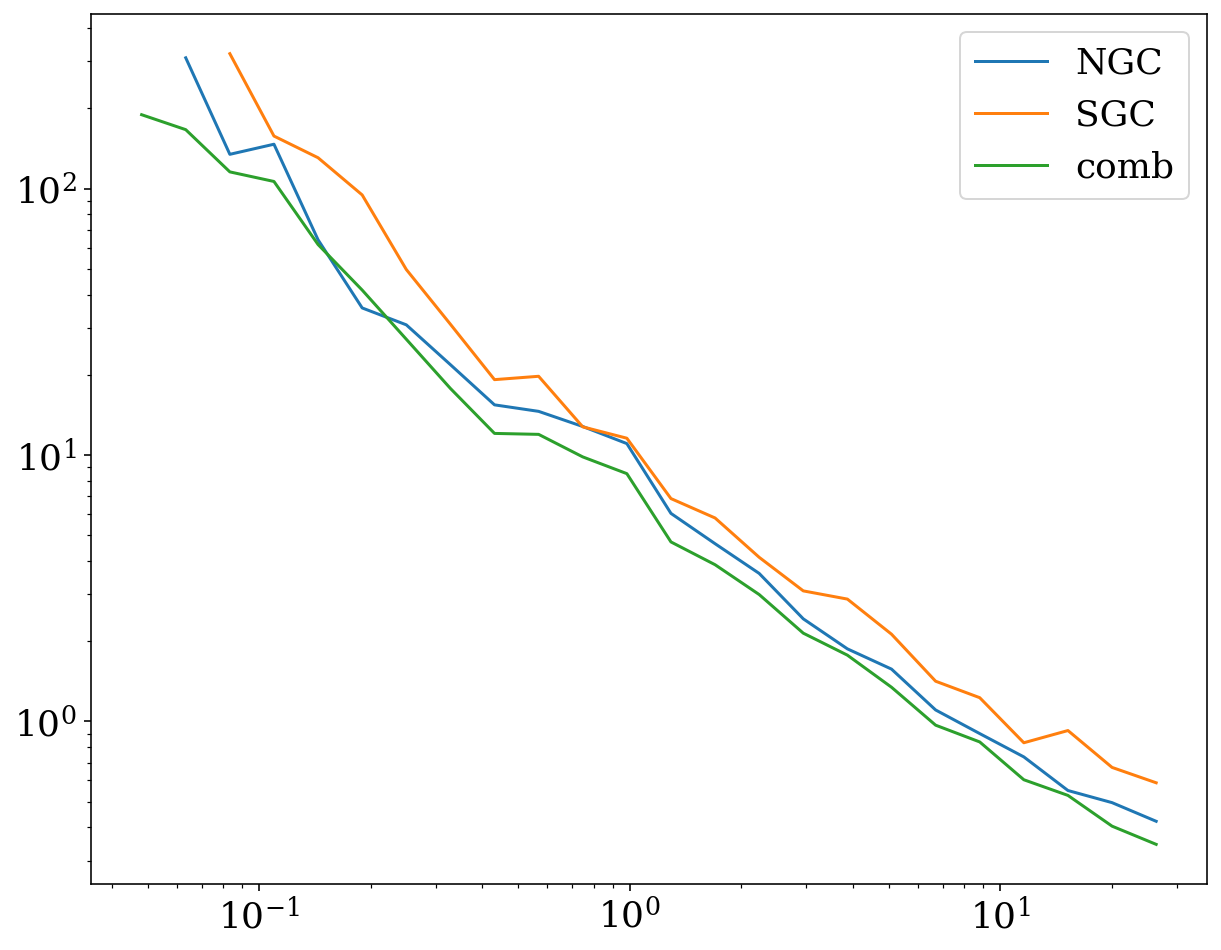

In [3]:
wpdir='/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/WP/'
wpfiles={'NGC':wpdir+'eBOSS_LRG_NGC_z1z2-0.7-1.1_v7_2_ALL_w1-wp-logrp-pi-NJN-90.txt',
        'SGC':wpdir+'eBOSS_LRG_SGC_z1z2-0.7-1.1_v7_2_ALL_w1-wp-logrp-pi-NJN-56.txt',
        'comb':wpdir+'eBOSS_LRG_NSGC_z1z2-0.7-1.1_v7_2_ALL_w1-wp-logrp-pi-NJN-146.txt'}

pl.figure(figsize=(10,8))
for tt,tkey in enumerate(wpfiles.keys()):
    tdata=np.loadtxt(wpfiles[tkey])
    #pl.errorbar(tdata[:,0],tdata[:,1],yerr=tdata[:,2],fmt='o',label=tkey)
    pl.plot(tdata[:,0],tdata[:,2],label=tkey)
    
pl.legend()

pl.xscale('log')
pl.yscale('log')


In [18]:
sys.path=['/Users/shock/Documents/Projects/CorrelationFunction/']+sys.path
import PairCountTOxi_utility as pcutil

In [54]:
#reload(pcutil)
# compare pair count for NGc-SGC and comb
pcdir='/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/PairCount/'
pip='_pip';usepip=1
#pip='';usepip=0
inroots=[pcdir+'eBOSS_QSO_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1%s-All-logrp-pi'%pip, 
         pcdir+'eBOSS_QSO_SGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1%s-All-logrp-pi'%pip]
njns=[90,56]

RRtype=''
samp='logrp-pi'

Lbox=0
pc1=pcutil.load_PairCount_output(inroots[0],RRtype=RRtype,samp=samp,Lbox=Lbox,usepip=usepip)
ii=1;
pc2=pcutil.load_PairCount_output(inroots[ii],RRtype=RRtype,samp=samp,Lbox=Lbox,usepip=usepip)
pc12=pcutil.comb_pc(pc1,pc2)

for cc,pc in enumerate([pc1,pc2,pc12]):
    pc['xi']=(pc['DD']-2*pc['DR']+pc['RR'])/pc['RR']

/Users/shock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Users/shock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


/Users/shock/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/shock/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/shock/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


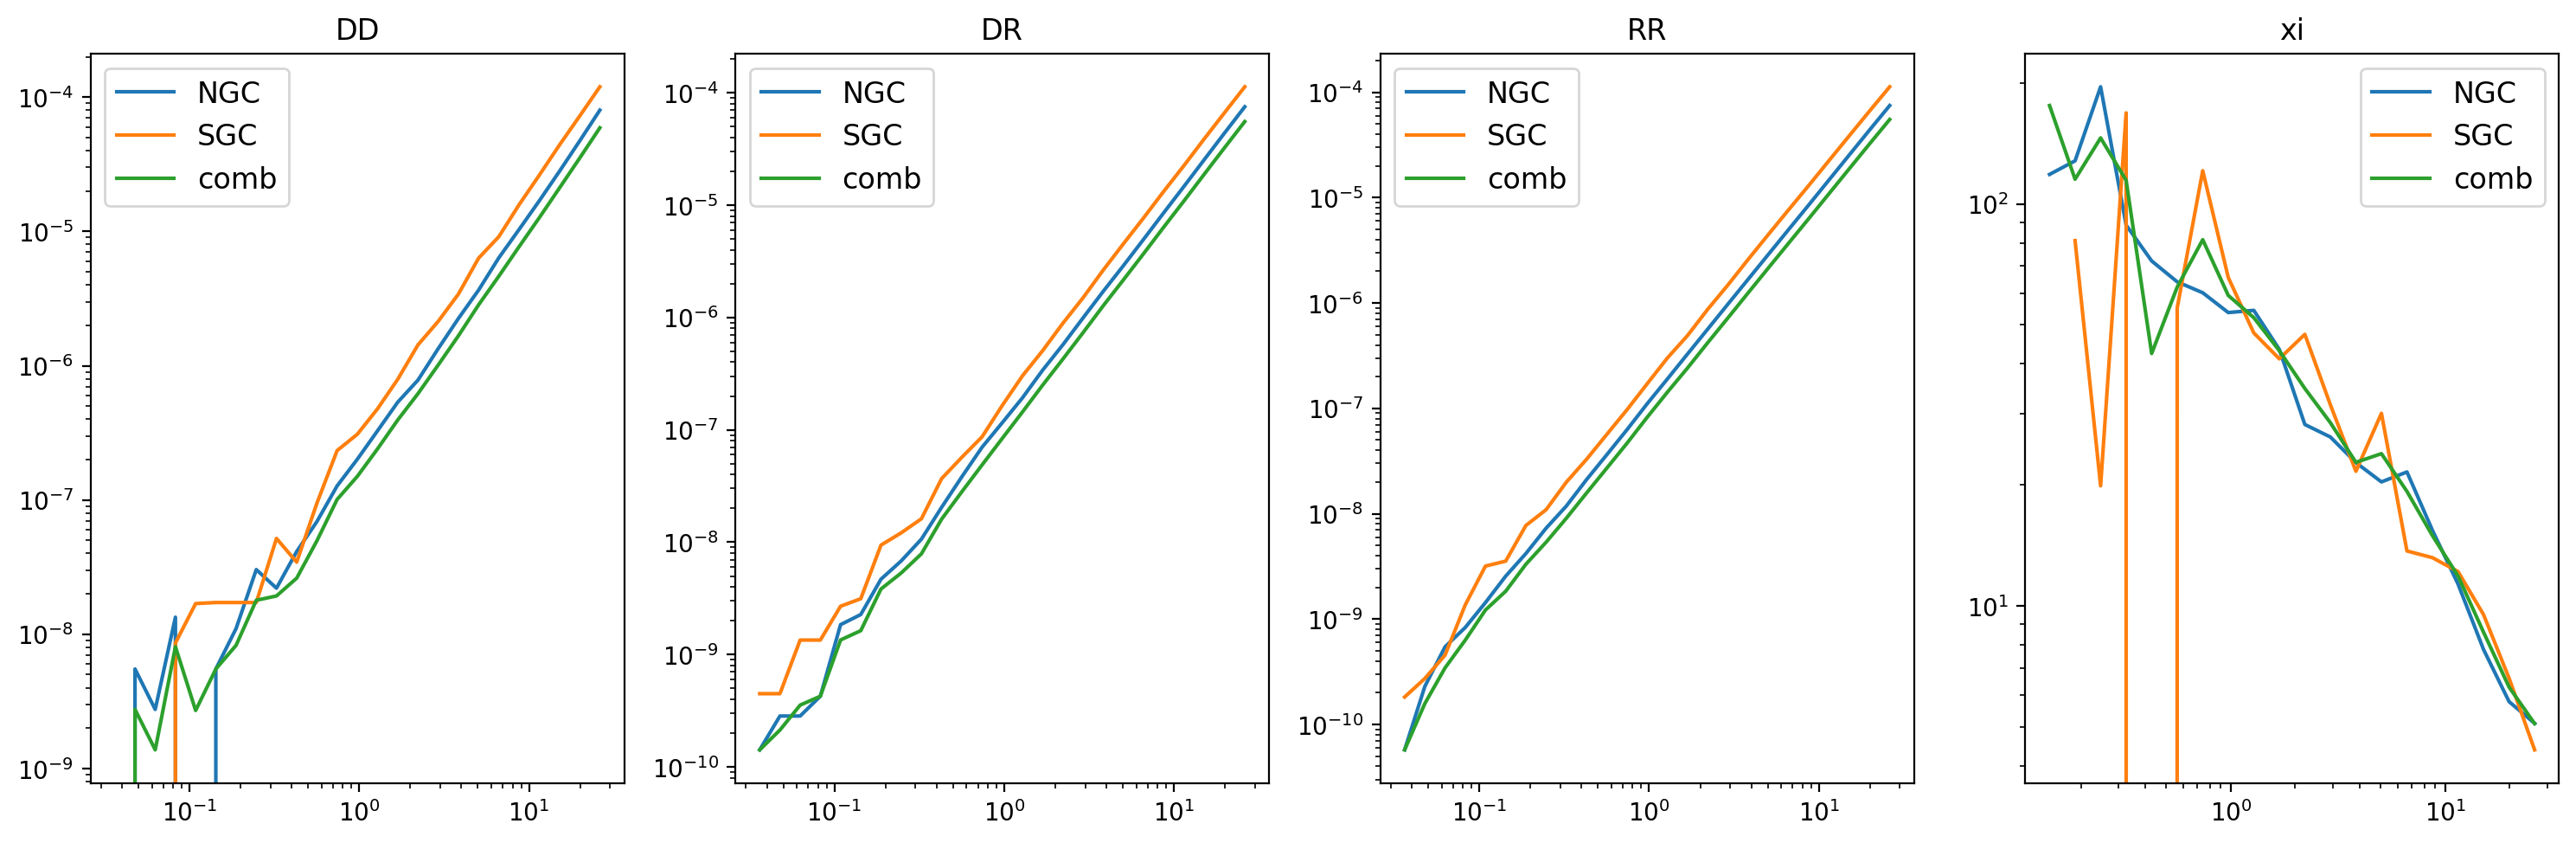

In [62]:
jj=-1

nrow=1;ncol=4
fig,axarr=pl.subplots(nrow,ncol,sharex=False,sharey=False,figsize=(15,nrow*5))

sbin_mid=0.5*(pc1['sbins'][1:]+pc1['sbins'][:-1])
sbin_mid=np.power(10,sbin_mid)

pclab=['NGC','SGC','comb']
for pp, pair in enumerate(['DD','DR','RR','xi']):
    pl.sca(axarr[pp])
    for cc,pc in enumerate([pc1,pc2,pc12]):
        if(jj==-1):
            yval=pc[pair].sum(axis=1)
            refval=pc1[pair].sum(axis=1)
        else:
            yval=pc[pair][:,jj]
            refval=pc1[pair][:,jj]
            
        pl.plot(sbin_mid,2*yval,label=pclab[cc])
    
    pl.title(pair) 
    pl.legend(fontsize=12)
    
    pl.xscale('log')
    pl.yscale('log')
    
pl.tight_layout()

pl.show()

In [23]:
!ls /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/PairCount/eBOSS_QSO_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_pip*DD.dat
#'eBOSS_LRG_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING*-wp-logrp-pi-NJN-90.txt'

/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/PairCount/eBOSS_QSO_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_pip-All-logrp-pi-DD.dat
/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/PairCount/eBOSS_QSO_NGC_z1z2-0.7-1.1_v7_2_CLUSTERING_w1_pip_angup-All-logrp-pi-DD.dat


# write the angular up weight file

In [79]:
def angular_upweight(roots_dic={'parent':'','fiber':''},outfile=''):
    '''calculates the angular upweights'''
    
    usepip_dic={'parent':0,'fiber':1}
    
    data_dic={}
    
    for tt,troot in enumerate(roots_dic.keys()):
        #data_dic[troot]={}
        for ff,ptype in enumerate(['DD']):#,'DR']):#,'norm','DR']):
            pcroot='%s-All-logangular'%(roots_dic[troot])
            pcfile='%s-All-logangular-%s.dat'%(roots_dic[troot],ptype)
            #print(tt,troot,ptype,pcfile)
            #data_dic[troot][ptype]=np.loadtxt(pcfile,skiprows=2)
            data_dic[troot]=load_PairCount_output(pcroot,RRtype='norand',
                                    samp='logangular',Lbox=0.0,usepip=usepip_dic[troot])
            data_dic[troot]['DD']=data_dic[troot]['DD'].reshape(data_dic[troot]['DD'].size)
            data_dic[troot]['DR']=data_dic[troot]['DR'].reshape(data_dic[troot]['DR'].size)
            
            if(ptype=='DD'): #load theta bins
                tlines=open(pcfile,'r').readlines()
                theta_list=tlines[0].split()
                theta = np.array([float(ele) for ele in theta_list])
                #convert logtheta to theta
                theta=np.power(10,theta)
                theta_mid=0.5*(theta[1:]+theta[:-1])

    out_head='theta_mid, theta_min, theta_max, wang_DD, wang_DR'
    out_mat=np.column_stack([theta_mid,theta[:-1],theta[1:]])
    
    #removing nan and infinities
    ind_bad=np.zeros(theta_mid.size,dtype=bool)
    
    for ff,ptype in enumerate(['DD','DR']):#,'DR']):
        ind_zero=data_dic['fiber'][ptype]==0
        data_dic['fiber'][ptype][ind_zero]=1
        ind_bad=ind_bad+ind_zero
        
        wang=data_dic['parent'][ptype]/data_dic['fiber'][ptype]
        out_mat=np.column_stack([out_mat,wang])
        
    print(ind_bad.shape)
    if(ind_bad.sum()>0):
        print('****** \n  Found zero pair count for fiber')
        msg='# %s \n'%(out_head)
        
        for ii in range(0,out_mat.shape[0]):
            if(ind_bad[ii]):
                for jj in range(out_mat.shape[1]):
                    msg=msg+str(out_mat[ii,jj])+'\t'
                msg=msg+'\n'
            
        print(msg+'\n\t ***')
        print('Removing these rows before writing them to file.')
        out_mat=out_mat[~ind_bad,:]
        
        #pl.plot(theta_mid,data_dic['parent'][ptype]/data_dic['fiber'][ptype],label='%s'%(ptype))
    #pl.xscale('log')
    #pl.legend()
    
    
    np.savetxt(outfile,out_mat,header=out_head)
    print('Angular up weights are written in file: \n  %s'%(outfile))
    
    return

pcdir='/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/PairCount/'

tracer='LRG'
#tracer='QSO'
#sky='SGC'
sky='NGC'

parent_root=pcdir+'eBOSS_%s_%s_v7_2_ALL_w1'%(tracer,sky)

pip=True
if(pip):
    fiber_root=pcdir+'eBOSS_%s_%s_v7_2_FIBER_w1_pip'%(tracer,sky)
    outfile=pcdir+'../wang_up/eBOSS_%s_%s_v7_2_FIBER_w1_pip.txt'%(tracer,sky)
else:
    fiber_root=pcdir+'eBOSS_%s_%s_v7_2_FIBER_w1'%(tracer,sky)
    outfile=pcdir+'../wang_up/eBOSS_%s_%s_v7_2_FIBER_w1.txt'%(tracer,sky)

roots_dic={'parent':parent_root,'fiber':fiber_root}

angular_upweight(roots_dic=roots_dic,outfile=outfile)

(30,)
****** 
  Found zero pair count for fiber
# theta_mid, theta_min, theta_max, wang_DD, wang_DR 
1.1540937574659489e-05	1e-05	1.3081875149318975e-05	0.0	1.0247916436982125	
1.5097513421069712e-05	1.3081875149318975e-05	1.711315169282045e-05	8.769105849021088e-11	0.9977925511380074	
1.9750181539251912e-05	1.711315169282045e-05	2.238721138568338e-05	6.138374094314761e-10	0.9915011263499158	

	 ***
Removing these rows before writing them to file.
Angular up weights are written in file: 
  /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/PairCount/../wang_up/eBOSS_LRG_NGC_v7_2_FIBER_w1_pip.txt


(0.9, 1.01)

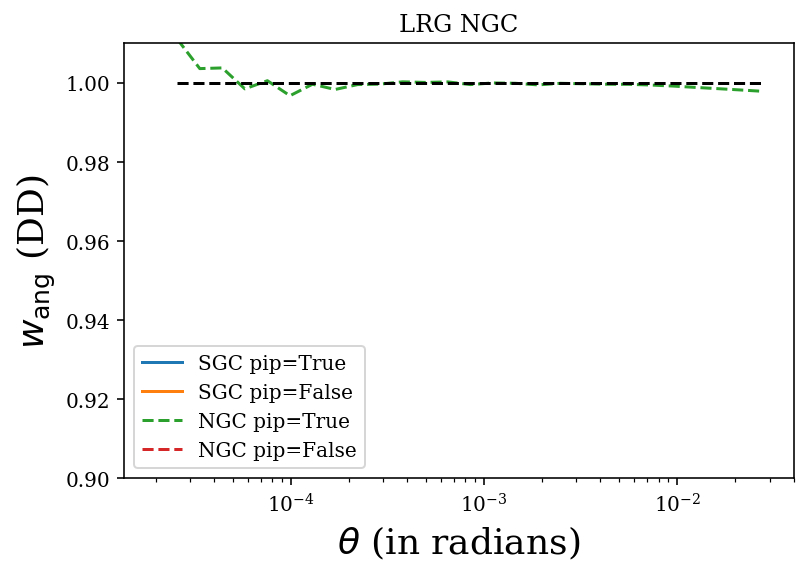

In [90]:
tmarks=['-','--']
tracer='LRG'
for ss,sky in enumerate(['SGC','NGC']):
    for pip in [True,False]:
        if(pip):
            fname=pcdir+'../wang_up/eBOSS_%s_%s_v7_2_FIBER_w1_pip.txt'%(tracer,sky)
        else:
            fname=pcdir+'../wang_up/eBOSS_%s_%s_v7_2_FIBER_w1.txt'%(tracer,sky)
        data=np.loadtxt(fname)
        pl.plot(data[:,0],data[:,4],tmarks[ss],label='%s pip='%sky+str(pip))

#pl.plot([0.000292,0.000292],[0,6],'k--',label='fiber (62 arcsec)')

pl.plot(data[:,0],data[:,0]*0+1,'k--')
pl.legend()
pl.xscale('log')
pl.xlabel(r'$\theta$ (in radians)',fontsize=18)
pl.ylabel(r'$w_{\rm ang}$ (DD)',fontsize=18)

pl.title('LRG %s'%sky)
#pl.yscale('log')
pl.ylim([0.9,1.01])

In [96]:
!cat /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/PairCount/../wang_up/eBOSS_LRG_NGC_v7_2.txt

# theta_mid, theta_min, theta_max, wang_DD, wang_DR
2.583694090728780080e-05 2.238721138568337924e-05 2.928667042889221897e-05 5.799999999999999822e+00 1.044682752457551489e+00
3.379912243556798372e-05 2.928667042889221897e-05 3.831157444224375186e-05 3.946241336062950023e+00 1.036960985626283360e+00
4.421514890248549824e-05 3.831157444224375186e-05 5.011872336272725140e-05 5.068672590617370410e+00 1.037138508371385104e+00
5.784170576508632382e-05 5.011872336272725140e-05 6.556468816744538946e-05 4.201915346062723877e+00 1.031664602865735025e+00
7.566680986156548131e-05 6.556468816744538946e-05 8.576893155568555960e-05 5.368912698444540332e+00 1.033796588755527379e+00
9.898538849294093026e-05 8.576893155568555960e-05 1.122018454301963009e-04 5.367476368441882251e+00 1.029874405560297523e+00
1.294914493871488284e-04 1.122018454301963009e-04 1.467810533441013694e-04 4.504271008823486966e+00 1.032881172002170445e+00
1.693968867251179088e-04 1.467810533441013694e-04 1.920127201061344211e-0

In [101]:
!ls /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/PairCount/../wang_up/

eBOSS_LRG_NGC_v7_2_FIBER_w1_pip.txt


In [28]:
5460719/151021.

36.158673297091134

In [353]:
wtag_list=['w1','w1-pip','w1-iip']#,'wsys','wsys-pip']
njn=90

for ww,wtag in enumerate(wtag_list):
    if(wtag!='w1-pip'):
        continue
    froot='abc-ang-%s'%wtag
    pcroot=wdir+froot
    xi2droot=wdir+'xx'
    xi02root=wdir+'WP/%s'%(froot)

    comm='-sampmode 6 -pcroot %s -xi2droot %s -xi02root %s -njn %d -usepip 1'%(
                        pcroot,xi2droot,xi02root,njn)

    !python ../PairCountTOxi.py  $comm




written: ../jnk/WP/abc-ang-w1-pip-wtheta_DP-angular-NJN-90.txt
written: ../jnk/WP/abc-ang-w1-pip-wtheta_LS-angular-NJN-90.txt


In [358]:
print(comm)

-sampmode 6 -pcroot ../jnk/abc-ang-w1-pip -xi2droot ../jnk/xx -xi02root ../jnk/WP/abc-ang-w1-pip -njn 90 -usepip 1


In [354]:
#Load angular clustering
wang_dic={}
for ww,wtag in enumerate(wtag_list):
    wang_dic[wtag]={}
    froot='abc-ang-%s'%wtag
    for est in ['DP','LS']:
        wang_file=wdir+'WP/%s-wtheta_%s-angular-NJN-%d.txt'%(froot,est,njn)
        wang_dic[wtag][est]=np.loadtxt(wang_file)
        

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


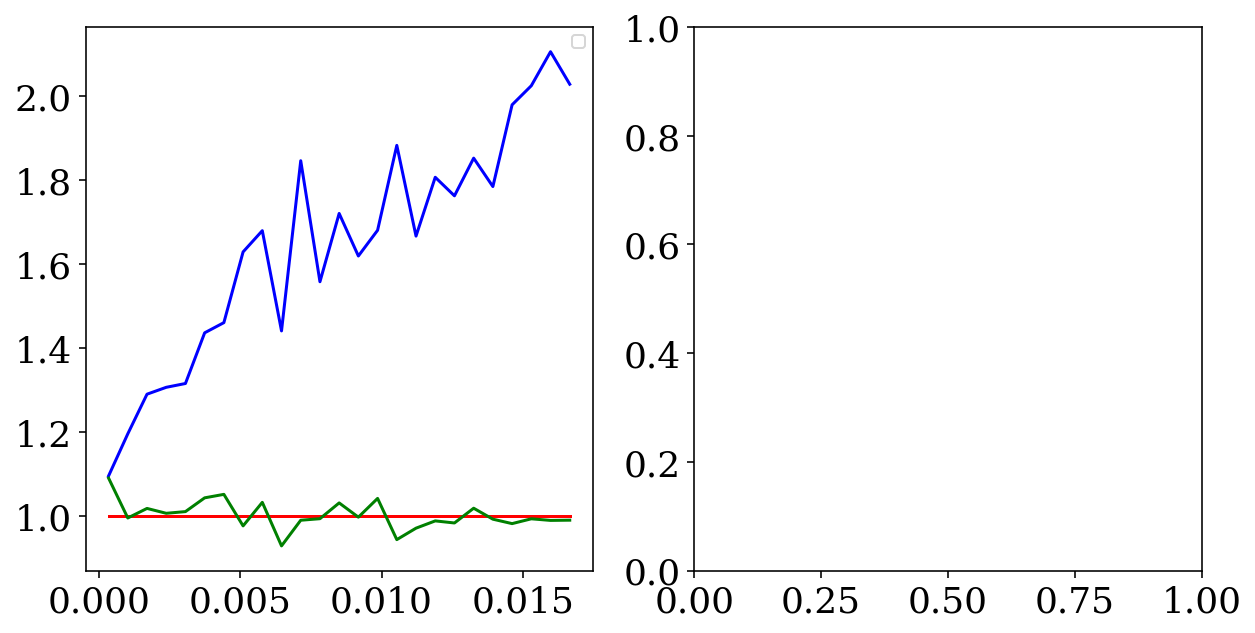

In [357]:
#plot wang
tcols=['r','b','g','c','m']
mfc=[None,'w']

nrow=1;ncol=2
fig,axarr=pl.subplots(nrow,ncol,sharex=False,sharey=False,figsize=(10,nrow*5))
#axarr=axarr.reshape(axarr.size)

for ww,wtag in enumerate(wtag_list):
    for ee,est in enumerate(['LS']):#['DP','LS']):
        twang=wang_dic[wtag][est]
        ref=wang_dic['w1'][est][:,2]
        tlab='%s-%s'%(wtag,est)
        
        if('pip' in wtag and 0):
            pl.sca(axarr[1])
        else:
            pl.sca(axarr[0])
        
        #pl.errorbar(twang[:,0]+ww*0.0,twang[:,3]/ref,yerr=twang[:,2]/ref,fmt='o',color=tcols[ww],mfc=mfc[ee],label=tlab)
        #for jn in range(4,94):
        #    pl.plot(twang[:,0]+ww*0.001,twang[:,jn]/ref,color=tcols[ww],mfc=mfc[ee])#,label=tlab)
        pl.plot(twang[:,0]+ww*0.0,twang[:,2]/ref,color=tcols[ww],mfc=mfc[ee])#,label=tlab)


        pl.legend(fontsize=8)


pl.sca(axarr[0])
#pl.yscale('log')

In [113]:
def load_PairCount_output(root,RRtype='',samp='',Lbox=0.0,usepip=0):
   #load sbins
   lines=open(root+'-DD.dat').readlines()
   sbins=np.array([np.float(x) for x in lines[0].split()])
   ns=sbins.size-1
   #load mu bins
   mubins=np.array([np.float(x) for x in lines[1].split()])
   nmu=mubins.size-1

   #load wieghts
   lines=open(root+'-norm.dat').readlines()
   if(usepip==0):
      Wsum_data=np.float(lines[0].split()[-1])
      Wsum_rand=np.float(lines[1].split()[-1])
      Wrat=Wsum_data/Wsum_rand
      DDnorm=np.power(Wsum_data,2)
      DRnorm=Wsum_data*Wsum_rand
      RRnorm=Wsum_rand*Wsum_rand
   else:
      DDnorm=np.float(lines[0].split()[-1])
      DRnorm=np.float(lines[1].split()[-1])
      RRnorm=np.float(lines[2].split()[-1])

   #load pair counts
   DD=np.loadtxt(root+'-DD.dat',skiprows=2)

   if(RRtype=='norand' and samp in ['rmu','rp-pi']): #dont and DR and RR count estimate RR analytically
      Wrat=Wsum_data/np.power(Lbox,3.0/2.0)
      DR=np.copy(DD)*0.0
      RR=np.copy(DD)
      if(samp=='rmu'):
         dr3=(2.0*np.pi/3.0)*(np.power(sbins[1:],3)-np.power(sbins[:-1],3))
         for mm, muthis in enumerate(mubins[:-1]):
            #estimate the volumes for rmu sampling
            RR[:,mm]=dr3*(mubins[mm+1]-mubins[mm])
      elif(samp=='rp-pi'):
         dr3=np.pi*(np.power(sbins[1:],2)-np.power(sbins[:-1],2))
         for mm, muthis in enumerate(mubins[:-1]):
            #estimate the volumes for rmu sampling
            RR[:,mm]=dr3*(mubins[mm+1]-mubins[mm])
         #print('################',samp,RR,sbins)
   else:
      DR=np.loadtxt(root+'-DR.dat',skiprows=2)
      try:
         RR=np.loadtxt(root+'-RR.dat',skiprows=2)
      except:
         RR=np.array([])
         #RR=np.loadtxt(root[:-4]+'0001-RR.dat',skiprows=2)

   #reshape the arrays
   if(nmu==1):
       DD=DD.reshape(DD.size,1)
       DR=DR.reshape(DR.size,1)
       RR=RR.reshape(RR.size,1)


   DD=DD/DDnorm
   DR=DR/DRnorm
   RR=RR/RRnorm
   pcdict={'sbins': sbins, 'ns': ns, 'mubins':mubins, 'nmu':nmu,
     'DD': DD, 'DR': DR, 'RR':RR,
     'DDnorm':DDnorm,'DRnorm': DRnorm, 'RRnorm': RRnorm}


   if(RR.size!=0):
      pcdict['RR']=RR/RRnorm

   #print ns,nmu,DD.shape, Wsum_data, Wsum_rand
   #print sbins, mubins

   return pcdict

pc_dic={}

selection='FIBER'

for ww,wtag in enumerate(['%s_w1'%selection,'%s_w1_angup'%selection,
                          '%s_w1_pip_angup'%selection,'ALL_w1',
                          'CLUSTERING_w1_angup',
                        'CLUSTERING_w1_pip','CLUSTERING_w1_pip_angup']):
    froot='%sPairCount/eBOSS_LRG_NGC_v7_2_%s-All-logangular'%(xi_dir,wtag)
    #froot=wdir+'abc-ang-%s-All-angular'%wtag
    if('pip' not in wtag and 'iip' not in wtag and 'angup' not in wtag):
        usepip=0
    else:
        usepip=1
        
    #print(usepip,froot)
    pc_dic[wtag]=load_PairCount_output(froot,RRtype='norand',samp='logangular',Lbox=0.0,usepip=usepip)
    print(wtag,pc_dic[wtag]['DDnorm'],pc_dic[wtag]['DRnorm'])

FIBER_w1 20161728064.0 201617280640.0
FIBER_w1_angup 22622637021.0 213619227010.0
FIBER_w1_pip_angup 21286565524.0 207138565730.0
ALL_w1 22807342441.0 824683244099.0
CLUSTERING_w1_angup 13073080665.0 622591399660.0
CLUSTERING_w1_pip 13184859293.0 604916607940.0
CLUSTERING_w1_pip_angup 13206000698.0 624387568020.0


In [107]:
wtag='%s_w1_pip_angup'%selection
print(wtag,pc_dic[wtag]['DDnorm'],pc_dic[wtag]['DRnorm'])

FIBER_w1_pip_angup 21478593263.0 207340406830.0


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


/Users/shock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


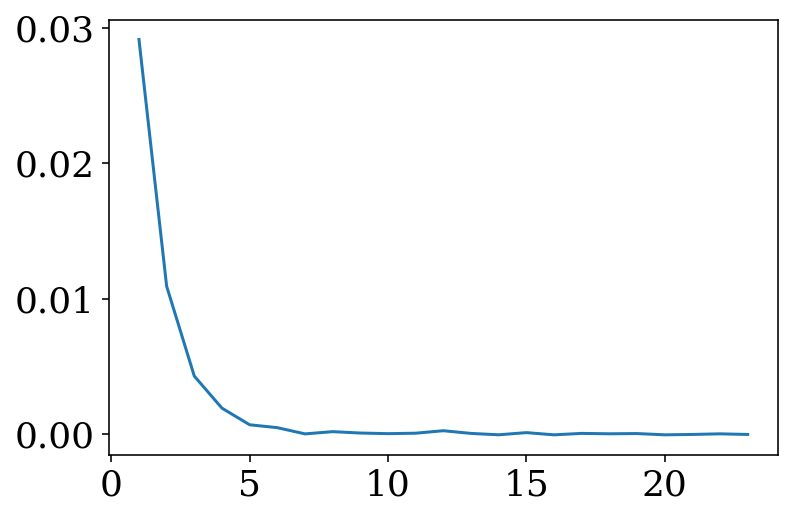

In [284]:
def new_norm(pcwiip_dic,pcwpip_dic,theta_max=1):
    
    sumD_iip=pcwiip_dic['DRnorm']
    sumD_pip=pcwpip_dic['DRnorm']
    
    indsel=pcwpip_dic['sbins'][1:]<theta_max
    print(np.sum(indsel))
    sumDD_iip_smalltheta=np.sum(pcwiip_dic['DD'][indsel])
    sumDD_pip_smalltheta=np.sum(pcwpip_dic['DD'][indsel])
    #sumrat=sumDD_pip_smalltheta/sumDD_iip_smalltheta
    
    #sumD2_pip_new=(sumD_iip*sumD_iip) - sumDD_iip_smalltheta+sumDD_pip_smalltheta
    sumD2_pip_new= sumD_iip*sumD_iip*sumDD_pip_smalltheta/sumDD_iip_smalltheta
    
    if(0):
        print('small:',sumDD_iip_smalltheta,sumDD_pip_smalltheta)
        print('iip:',np.power(sumD_iip,2))
        print('pip old:',np.power(sumD_pip,2))
        print('pip new',sumD2_pip_new)
    
    return sumD2_pip_new

theta=pc_dic['w1']['sbins'][1:]
norms=np.zeros(theta.size)
for tt,th in enumerate(theta):
    norms[tt]=new_norm(pc_dic['w1-iip'],pc_dic['w1-pip'],theta_max=th)
    
#pl.plot(theta,norms/np.power(pc_dic['w1-pip']['DRnorm'],2))
pl.plot((norms[1:]-norms[:-1])/np.power(pc_dic['w1-pip']['DRnorm'],2))   

0 w1 11556250000.0
1 w1-pip 13184859291.72484
2 w1-iip 12271322176.0


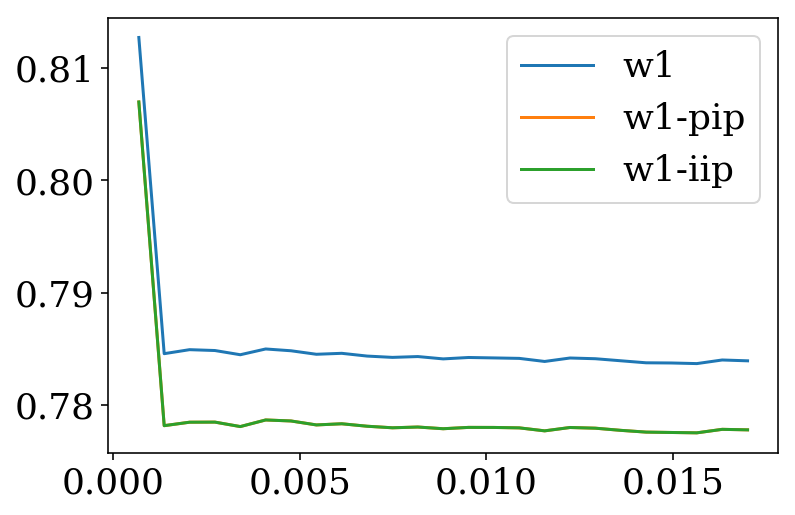

In [324]:
def get_xi(pcdic):
    normDD=pcdic['DD']#/(pcdic['DRnorm']*pcdic['DRnorm'])
    normDR=pcdic['DR']*(pcdic['DRnorm']/pcdic['RRnorm'])
    normRR=pcdic['RR']*np.power(pcdic['DRnorm']/pcdic['RRnorm'],2)
    
    xi=(normDD-2*normDR+normRR)/normRR
    
    return np.column_stack([pcdic['sbins'][1:],xi])


tmarks=['o','s','x','+']
pc='DD'
norm1='DRnorm'

if(pc=='DD'):
    norm2='DRnorm'
elif(pc=='DR'):
    norm2='RRnorm'
elif(pc=='RR'):
    norm1='RRnorm'
    norm2='RRnorm'
    
for ww,wtag in enumerate(['w1','w1-pip','w1-iip']):#,'w1-pip-new']):
    
    if(wtag!='w1-pip-new'):
        print(ww,wtag,pc_dic[wtag][norm1]*pc_dic[wtag][norm2])
        normDD=pc_dic[wtag][pc]/(pc_dic[wtag][norm1]*pc_dic[wtag][norm2])
        xi=get_xi(pc_dic[wtag])
    else:
        #nn=pc_dic['w1-pip'][norm1]*pc_dic['w1-pip'][norm2]
        nn=new_norm(pc_dic['w1-iip'],pc_dic['w1-pip'])
        print(ww,wtag,nn)
        normDD=pc_dic['w1-pip'][pc]/nn
        
    normref=1#pc_dic['w1']['DD']/np.power(pc_dic['w1']['DRnorm'],2)
    #pl.plot(pc_dic['w1']['sbins'][1:],normDD/normref,tmarks[ww],color=tcols[ww],label=wtag)

    pl.plot(xi[:,0],xi[:,1],label=wtag)
    pl.legend()

ALL_w1 DRnorm 824683244099.0
FIBER_w1 DRnorm 201617280640.0
FIBER_w1_angup DRnorm 213619227010.0
FIBER_w1_pip_angup DRnorm 207138565730.0


(0.98, 1.02)

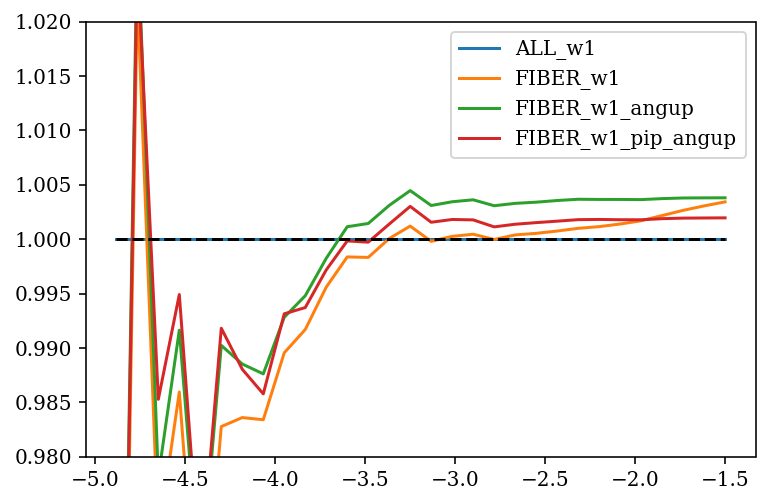

In [117]:
theta=pc_dic['%s_w1'%selection]['sbins'][1:]
pct='DR'

if(0):
    tmp_list=['CLUSTERING_w1','CLUSTERING_w1_angup',
                        'CLUSTERING_w1_pip','CLUSTERING_w1_pip_angup']
else:
    tmp_list=['ALL_w1','%s_w1'%selection,'%s_w1_angup'%selection,'%s_w1_pip_angup'%selection,]
    
for ww,wt in enumerate(tmp_list):
    ref=np.cumsum(pc_dic['ALL_w1'][pct])#*pc_dic[wt]['%snorm'%pct]/pc_dic['ALL_w1']['%snorm'%pct]
    pl.plot(theta,np.cumsum(pc_dic[wt][pct])/ref,label=wt)
    
    print(wt,pct+'norm',pc_dic[wt]['%snorm'%pct])

pl.plot(theta,theta*0+1,'k--')
pl.legend()
#pl.yscale('log')
pl.ylim([0.98,1.02])
    

In [209]:
np.power(13073080665.36253,2)

1.709054380830756e+20

In [62]:
def radian_arcsec(rad):
    asec=rad*(180.0/np.pi)*3600
    return asec

radian_arcsec(5e-3)

1031.324031235482

In [105]:
(0.3101-0.296)/0.0056

2.5178571428571432

In [108]:
print(32/1860. , np.power(32/1860.,2))

0.017204301075268817 0.0002959879754884958


In [185]:
import gmpy2 as gmpy

In [227]:
tmp='/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromSarah/data/eBOSS_LRG_NGC_pip_v7_2_new_withS_z0.6_z1.0.fits'
with F.FITS(tmp) as fin:
    bw=fin[1]['WEIGHT_BW'][:]
    print(fin[1])
    


  file: /Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromSarah/data/eBOSS_LRG_NGC_pip_v7_2_new_withS_z0.6_z1.0.fits
  extension: 1
  type: BINARY_TBL
  rows: 107500
  column info:
    s                   f8  
    EBOSS_TARGET_ID     i8  
    RA                  f8  
    DEC                 f8  
    Z                   f8  
    WEIGHT_SYSTOT       f8  
    WEIGHT_CP           f8  
    WEIGHT_NOZ          f8  
    WEIGHT_FKP          f8  
    WEIGHT_BW           i8  array[60]
    FIBER               i8  
    CLUSTERING          i8  


In [233]:
fib=np.ascontiguousarray(bw,dtype=np.int32)

In [234]:
print(bw.dtype,fib.dtype)

>i8 int32


In [235]:
pcount=np.zeros(bw.shape[0])
for ii in range(0,pcount.size):
    for jj in range(0,60):
        pcount[ii]=pcount[ii]+gmpy.popcount(np.int(fib[ii,jj]))
    #print(ii,pcount[ii])

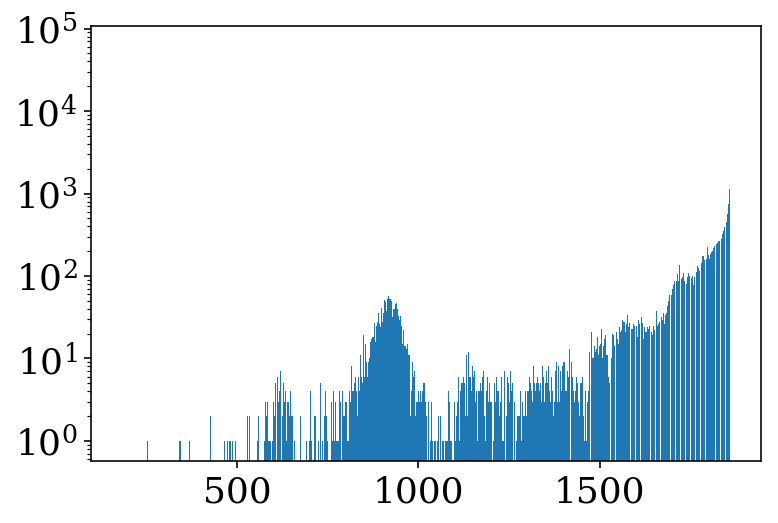

In [236]:
hh=pl.hist(pcount,bins=1800)
pl.yscale('log')

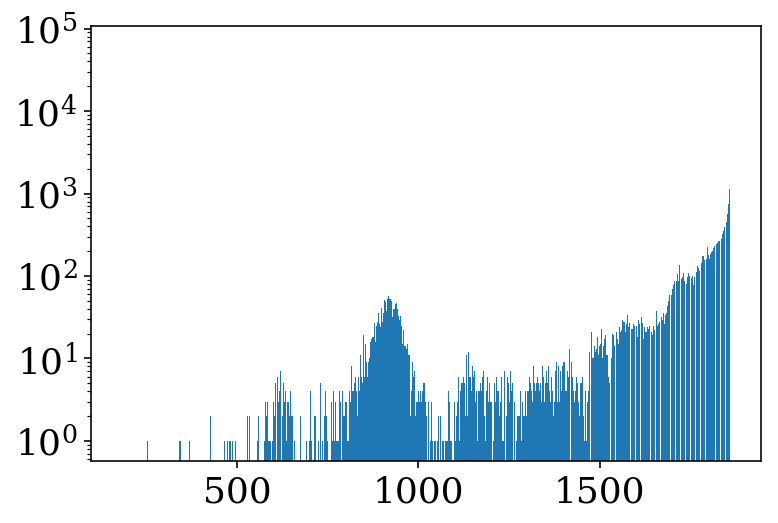

In [219]:
hh=pl.hist(pcount,bins=1800)
pl.yscale('log')

In [241]:

for jj in range(0,60):
    print(jj,gmpy.popcount(np.int(fib[0,jj])))

0 31
1 31
2 31
3 31
4 31
5 31
6 31
7 31
8 31
9 31
10 31
11 31
12 31
13 31
14 31
15 31
16 31
17 31
18 31
19 31
20 31
21 31
22 31
23 31
24 31
25 31
26 31
27 31
28 31
29 31
30 31
31 31
32 31
33 31
34 31
35 31
36 31
37 31
38 31
39 31
40 31
41 31
42 31
43 31
44 31
45 31
46 31
47 31
48 31
49 31
50 31
51 31
52 31
53 31
54 31
55 30
56 31
57 31
58 31
59 31


In [200]:
!ls /Users/shock/Downloads/eBOSS_LRG_NGC_pip_v7_2_new.dat.fits

ls: eBOSS_LRG_NGC_pip_v7_2_new_withS_z0.6_z1.0.fits: No such file or directory


In [361]:
#with F.FITS('/Users/shock/Downloads/eBOSS_LRG_NGC_pip_v7_2_new_withS_z0.6_z1.0.fits') as fin:
with F.FITS('/Users/shock/Downloads/eBOSS_LRG_NGC_pip_v7_2_new.dat.fits') as fin:
    print(fin[1])
    print(np.sum(fin[1]['CLUSTERING'][:]))


  file: /Users/shock/Downloads/eBOSS_LRG_NGC_pip_v7_2_new.dat.fits
  extension: 1
  type: BINARY_TBL
  rows: 151021
  column info:
    EBOSS_TARGET_ID     i8  
    RA                  f8  
    DEC                 f8  
    Z                   f8  
    WEIGHT_SYSTOT       f8  
    WEIGHT_CP           f8  
    WEIGHT_NOZ          f8  
    WEIGHT_FKP          f8  
    WEIGHT_BW           i8  array[60]
    FIBER               i8  
    CLUSTERING          i8  
107500


In [362]:
107500/151021.

0.7118215347534449

In [ ]:
http://www.astro.utah.edu/~u6022465/4Shadab/data/eBOSS_LRG_NGC_pip_v7_2_ran_withS_z0.6_z1.0_downsampled.fits
http://www.astro.utah.edu/~u6022465/4Shadab/data/eBOSS_LRG_NGC_pip_v7_2_new_withS_z0.6_z1.0.fits
http://www.astro.utah.edu/~u6022465/4Shadab/data/eBOSS_LRG_NGC_pip_v7_2_new.dat.fits
http://www.astro.utah.edu/~u6022465/4Shadab/data/eBOSS_LRG_NGC_pip_v7_2.ran.fits

In [11]:
from astropy.cosmology import WMAP9 as cosmo
res=cosmo.comoving_distance([0.05, 0.1, 0.36])*cosmo.h 
print(res)

[148.26704569 293.21136903 991.22352176] Mpc


In [54]:
tw=np.loadtxt('/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/Wtheta/eBOSS_ELG_NGC_v7_2_ALL_w1-wtheta_DP-logangular-NJN-90.txt')

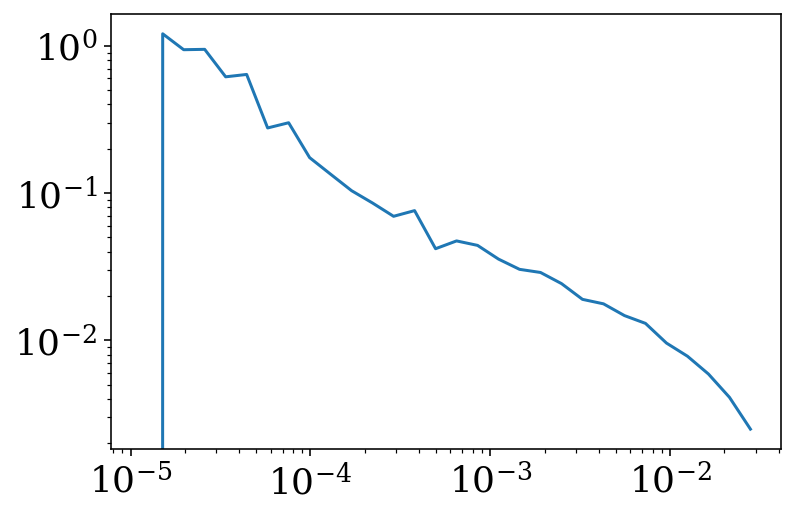

In [57]:
pl.plot(tw[:,0],tw[:,1])
pl.xscale('log')
pl.yscale('log')

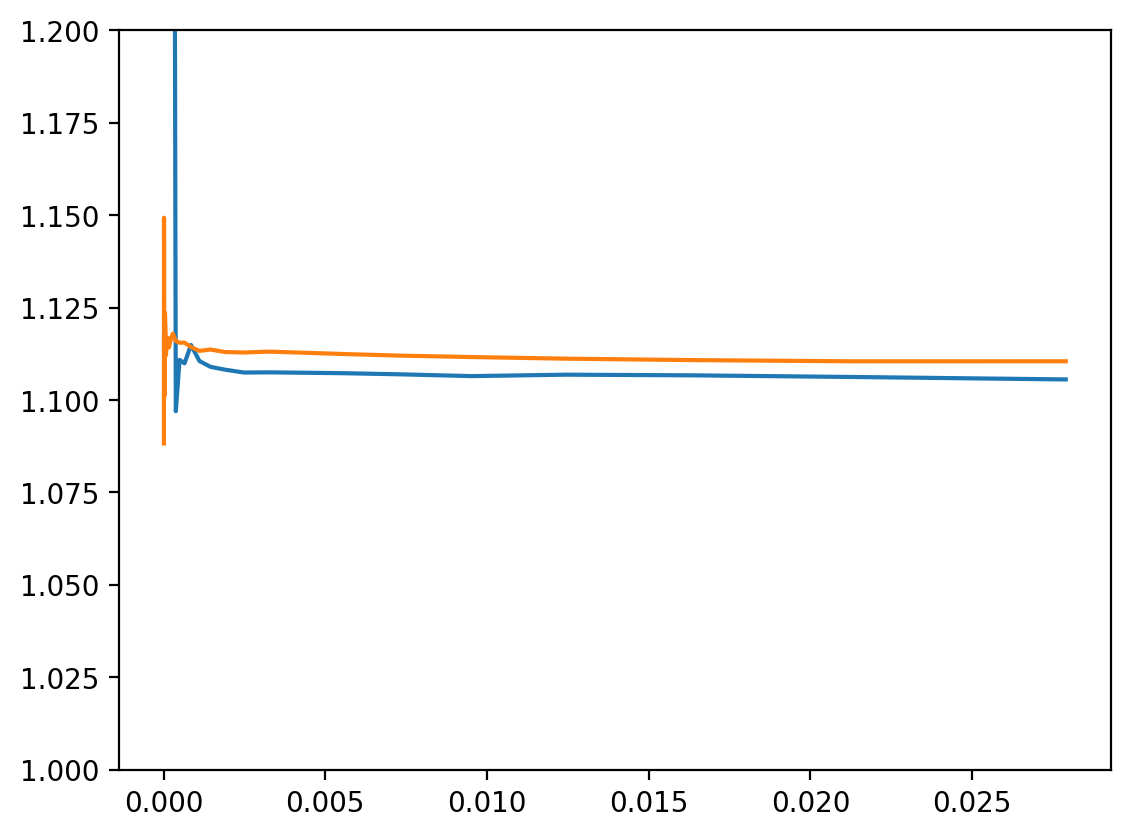

In [85]:
tmpfile='/Users/shock/Documents/Projects/Projects/MultiHODFitter/eBOSS_fromFaizan/XI/wang_up/eBOSS_ELG_NGC_v7_2_FIBER_w1_wang.txt'
tdat=np.loadtxt(tmpfile)
pl.plot(tdat[:,0],tdat[:,3])
pl.plot(tdat[:,0],tdat[:,4])

pl.ylim([1.0,1.2])
pl.show()

[-5.      -4.88333 -4.76667 -4.65    -4.53333 -4.41667 -4.3     -4.18333
 -4.06667 -3.95    -3.83333 -3.71667 -3.6     -3.48333 -3.36667 -3.25
 -3.13333 -3.01667 -2.9     -2.78333 -2.66667 -2.55    -2.43333 -2.31667
 -2.2     -2.08333 -1.96667 -1.85    -1.73333 -1.61667 -1.5    ]


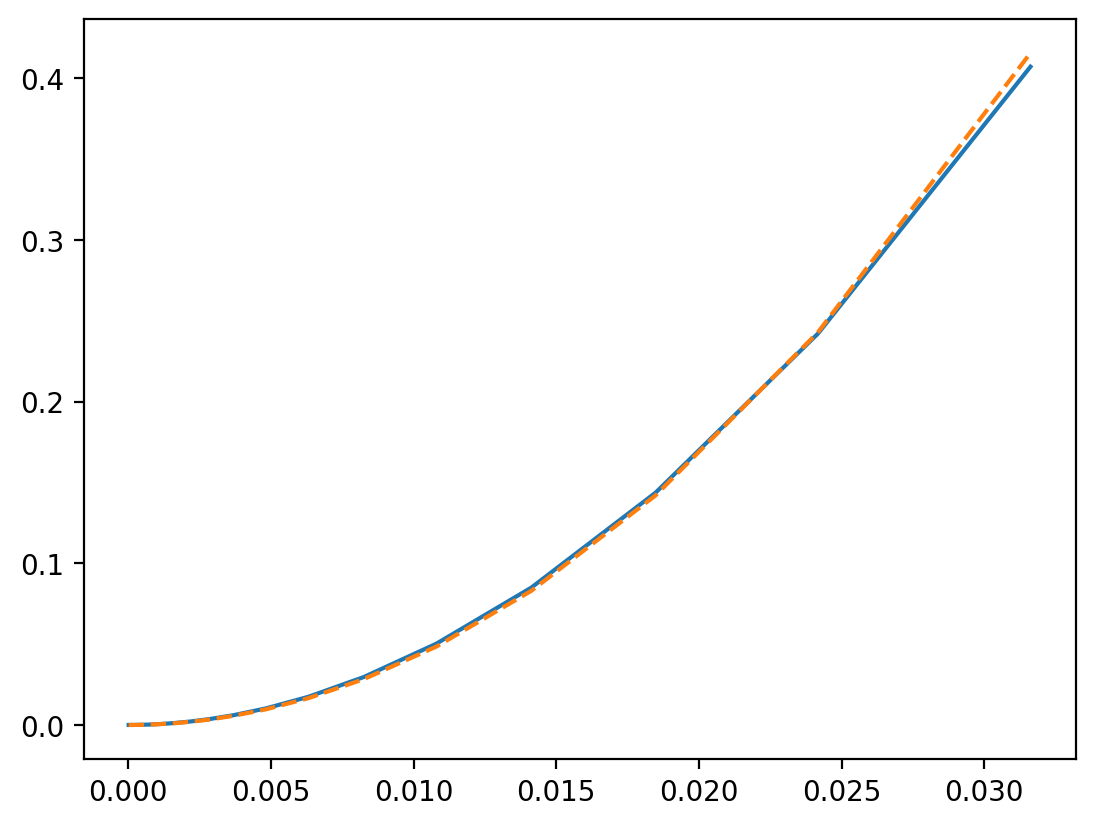

In [28]:
tmp_file='../example/PairCount/fastpc_test_angup-All-logangular-DD.dat'
xsamp=open(tmp_file).readline().split()
xsamp=np.asarray(xsamp, dtype = np.float) 
theta=np.power(10,xsamp)

print(xsamp)

tdat=np.loadtxt(tmp_file,skiprows=2)

pl.plot(theta[1:],tdat/tdat.sum())
ymodel=np.power(theta[1:],2)
pl.plot(theta[1:],ymodel/ymodel.sum(),'--')

In [42]:
print(theta.size)
n=theta.size-1
rands=np.random.random(2000)*0.04
rands_dic={'2':np.power(rands,2),
            '2.2':np.power(rands,2.2),
           '1.8':np.power(rands,1.8)}

31


0 2 7336 3.668
1 2.2 6923 3.4615
2 1.8 7914 3.957


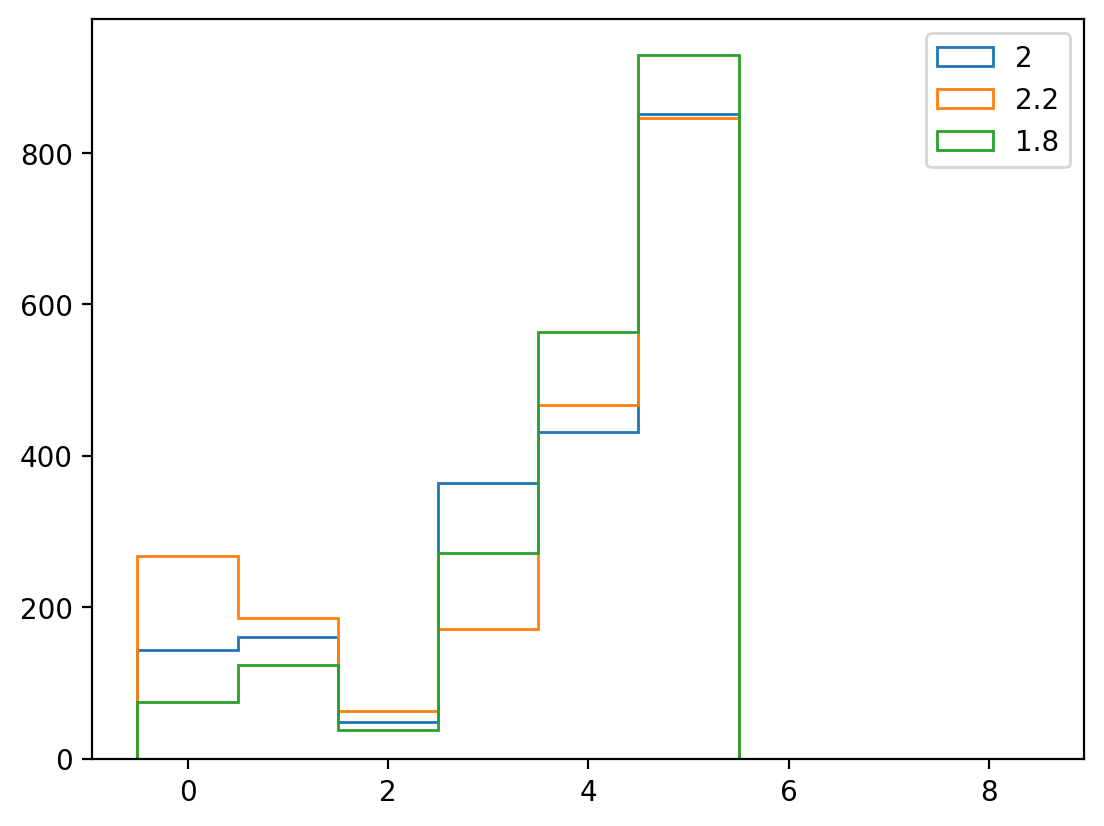

In [45]:
def find_dist_bin_reverse(dist, dbin, n):
    count=0
    if(dist<dbin[0]):
        return -1,count
    
    li=0;ui=n-1;
    while(li<=ui):
        count=count+1
        ii=np.int((li+ui)/2)
        if(dbin[ii+1]<=dist):
            li=ii+1
        elif(dbin[ii]>dist):
            ui=ii-1
        else:
            return n-ii-1,count
    return -1 ,count

def eff_find_dist_bin_reverse(dist, dbin, n,iguess=None):
    count=0
    if(dist<dbin[0]):
        return -1,count
    
    li=0;ui=n-1;
    
    while(li<=ui):
        count=count+1
        ii=np.int((li+ui)/2)
        if(dbin[ii+1]<=dist):
            li=ii+1
        elif(dbin[ii]>dist):
            ui=ii-1
        else:
            return n-ii-1,count
    return -1 ,count


iter_dic={}
for tt,tpow in enumerate(rands_dic.keys()):
    iter_dic[tpow]=[]
    for jj in range(0,rands_dic[tpow].size):
        ind,cc=eff_find_dist_bin_reverse(rands_dic[tpow][jj], theta, theta.size-1,split=0.5)
        iter_dic[tpow].append(cc)
    iter_dic[tpow]=np.array(iter_dic[tpow])
    print(tt,tpow,iter_dic[tpow].sum(),1.0*iter_dic[tpow].sum()/iter_dic[tpow].size)
    
    pl.hist(iter_dic[tpow],bins=np.arange(0,10)-0.5,label=str(tpow),histtype='step')
    
pl.legend()